# Project Name :Stock market Prediction 
 ###   dataset : TSLA.csv

# Definition for the project
> The project aims to develop a stock market prediction system using historical data of a specific stock, in this case, i have used Tesla (TSLA) dataset. The system utilizes machine learning techniques to forecast future stock prices based on past price movements, trading volume, and other relevant factors. The goal is to provide insights and predictions that can assist investors and traders in making informed decisions.

# About Dataset
Tesla Stock Dataset from 2010 to 2021

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [2]:
df = pd.read_csv('TSLA.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [4]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
df.shape

(2416, 7)

# Data Exploring

In [6]:
# it will check datatype of dataset and also it check if any null values are there or not in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [7]:
# it will show the number of null values from the dataset
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# summary of the statistical measures for each column in a Dataset.
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


# Heatmap and Correlation matrics

In [9]:
# Extract the required columns for the heatmap
data = df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [10]:
# Calculate the correlation matrix
corr_matrix = data.corr()

<AxesSubplot:>

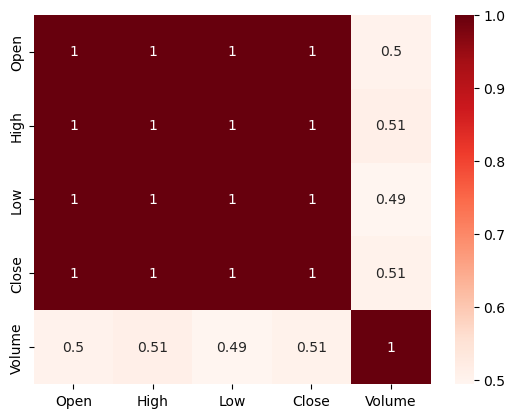

In [11]:
# Create the heatmap
sns.heatmap(corr_matrix,annot=True,cmap='Reds')

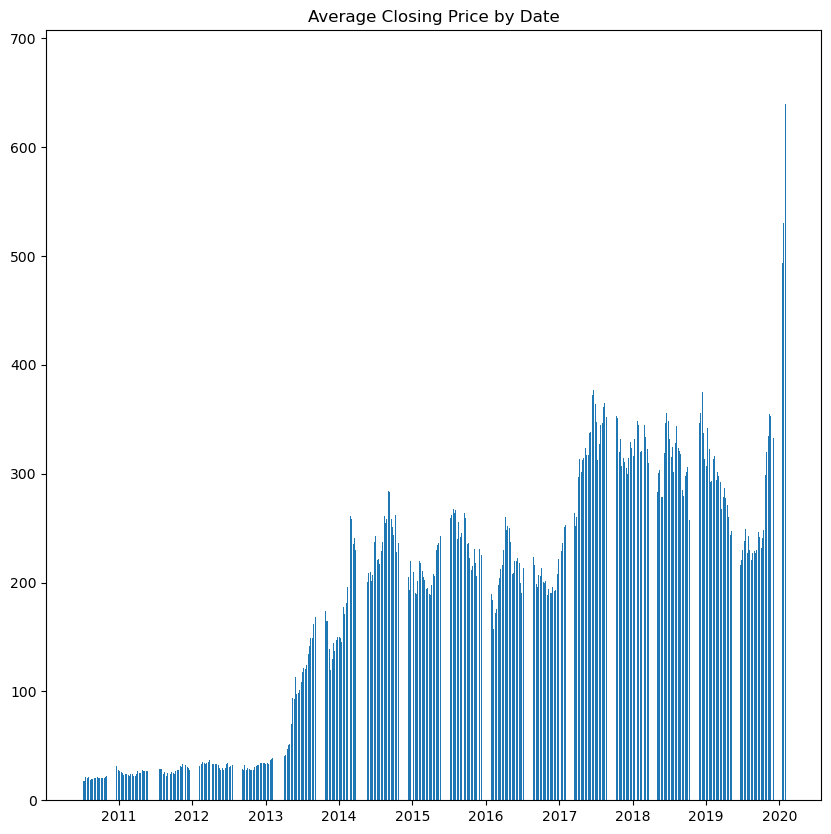

In [51]:
# Using groupby in Date column and Close column and calculate the average closing price for each group
close = df.groupby('Date')['Open'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 10))
plt.bar(close.index, close)
plt.title('Average Closing Price by Date')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility if needed
plt.show()

>  It calculates the average closing price for each group. It will visualize the overall trend or pattern in the average closing prices over time. The average closing prices is highest stock price at end of 2020 year

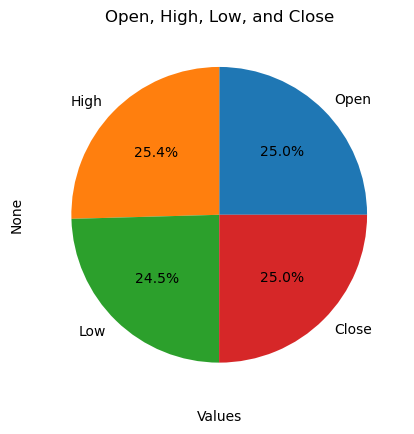

In [13]:
# Dataframe with Open, High, Low, Close columns
df[['Open', 'High', 'Low','Close']].sum().plot(kind='pie', autopct='%1.1f%%')

plt.xlabel('Values')
plt.title('Open, High, Low, and Close')
plt.show()

 > calculating the sum of each column and then calculating the precentage of each column to represent in this pie chart

In [14]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format

In [48]:
# Group the data by the "date" column and calculate the mean of the "open" column
grouped= df.groupby('Date')['Close'].mean()

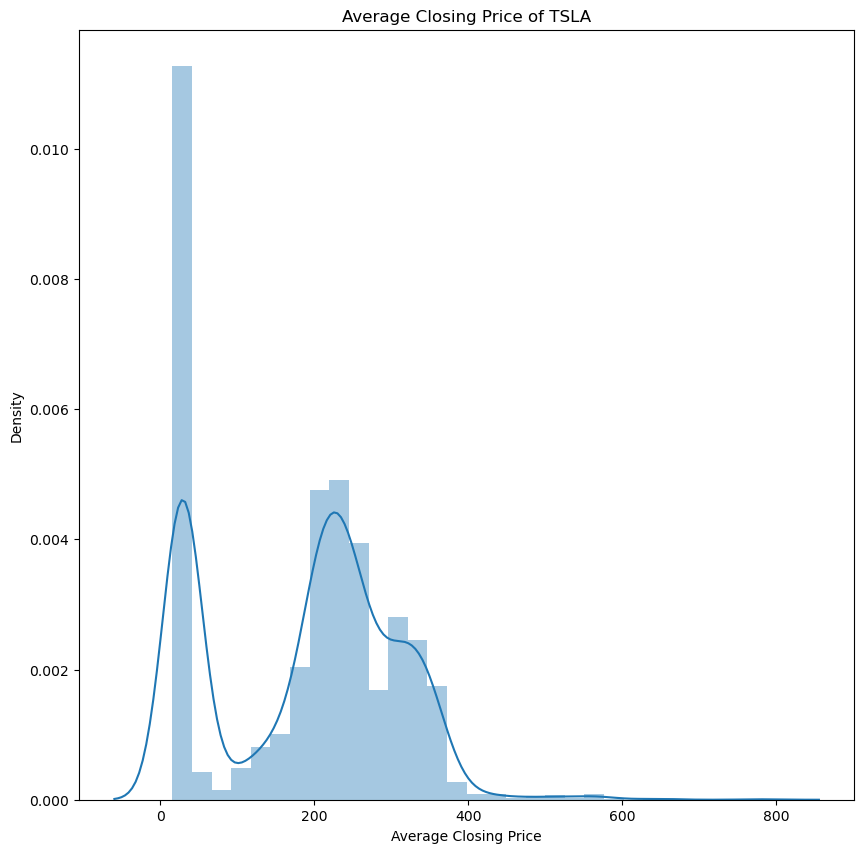

In [50]:
prices = grouped.values

# Create the distplot
plt.figure(figsize=(10, 10))
sns.distplot(prices, bins=30)  # if distplot is deprecated, use sns.histplot instead
plt.title('Average Closing Price of TSLA')
plt.xlabel('Average Closing Price')
plt.ylabel('Density')

# Show the plot
plt.show()

> A histogram visually represents the distribution of numerical data by dividing the data into bins of different ranges. The number of data points that fall into each bin are represented by the height of a bar above that bin.

> the average closing price for the TSLA stock in your data ranged between these values from 0 to 700.

# Select the features (X) and the target variable (y)

In [17]:
# Select the features (X) and the target variable (y)
features = df[['Open', 'High', 'Low', 'Volume']]  # Input features
target = df['Close']  # Target variable

# spliting the dataset into train and test sets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# X_train and y_train represent the training data
# X_test and y_test represent the test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [20]:
X_train

,Open,High,Low,Volume
1666,266.250000,271.179993,266.149994,7820200
1563,197.059998,198.490005,193.449997,3589400
544,30.000000,30.850000,29.650000,1471000
1025,222.720001,226.970001,221.750000,3087100
821,188.589996,191.830002,175.399994,20775400
...,...,...,...,...
1638,218.559998,219.199997,214.119995,4045000
1095,243.000000,247.559998,241.320007,4203800
1130,223.809998,224.320007,219.520004,4505700
1294,260.329987,260.649994,255.020004,3604300


In [21]:
y_train

1666    269.200012
1563    196.050003
544      30.730000
1025    223.570007
821     180.949997
           ...    
1638    214.679993
1095    242.589996
1130    220.970001
1294    255.250000
860     120.500000
Name: Close, Length: 1932, dtype: float64

# Using normalization for feature scaling 

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [23]:
# initializing StandardScaler with scaler
scaler = StandardScaler()

# initializing MinMaxScaler with sc
sc = MinMaxScaler(feature_range=(0,1))

In [24]:
# fiting the x_train set using MinMaxScaler
sc.fit(X_train)

MinMaxScaler()

In [25]:
# fiting the x_train set using StandardScaler
scaler.fit(X_train)

StandardScaler()

In [26]:
# Fit and transform the data using Standard Scaler
scaled_data_standard = scaler.fit_transform(X_train)

In [27]:
scaled_data_standard

array([[ 0.68124829,  0.6821323 ,  0.71996994,  0.43300187],
       [ 0.09280486,  0.07516557,  0.09186694, -0.4068481 ],
       [-1.32799809, -1.32464076, -1.32330878, -0.82736861],
       ...,
       [ 0.32030683,  0.29084798,  0.31710284, -0.22495472],
       [ 0.63090008,  0.59420603,  0.62381065, -0.40389032],
       [-0.56784386, -0.55751952, -0.57641049,  1.63701578]])

In [28]:
# Fit and transform the data using MinMax Sclaer
minmax = sc.fit_transform(X_train)

In [29]:
minmax

array([[0.38036651, 0.33079491, 0.3814043 , 0.1640527 ],
       [0.27514257, 0.23633221, 0.27100858, 0.07393309],
       [0.02107825, 0.01847929, 0.02227655, 0.02880939],
       ...,
       [0.31582389, 0.26989903, 0.31059616, 0.09345106],
       [0.37136337, 0.31711088, 0.36450329, 0.07425048],
       [0.15700707, 0.13786695, 0.15355179, 0.2932487 ]])

#  Linear Regression 

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
# initializing Linear Regression with lr which represent Linear Regression
lr=LinearRegression()

In [32]:
# fiting X_train,y_train set using linear regression
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [34]:
# displaying the y_pred
y_pred

array([ 31.44206177,  24.52988898, 278.90510109, 330.67352198,
       262.08142218, 381.90729039,  29.09570903, 212.1742186 ,
       225.06169066, 307.80420179,  34.50033779, 361.9056908 ,
        26.45625495, 419.92945868, 311.45509087,  30.03764163,
       191.63013711, 234.01371581, 362.83952656,  96.08507755,
       313.79667736, 292.54556274, 220.5042004 ,  23.2730571 ,
       379.54318066,  28.45998775,  28.31989413, 210.5013221 ,
       233.86979724, 225.09005037, 255.0754546 ,  20.32050098,
       259.57101136, 220.80741596, 637.10139941, 208.60477906,
       209.10412797, 217.28354366, 294.75391551,  33.99357035,
       146.5104529 , 234.98690688, 313.29438519,  25.06654922,
       230.85285327, 297.71580786,  32.30456231, 148.09259823,
       229.40112069,  39.18284053, 223.22379618,  33.28371033,
        37.19320035, 357.77729796, 199.88055409,  38.19614102,
        34.10702552, 226.34480561, 234.64920635,  27.68106438,
       290.90648957, 152.56973451,  33.86887253, 336.96

### Applying Mean Squared Error , Mean Absolute Error and Root Mean Squared Error after applying Linear Regression

In [35]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1.3377885628495352


In [36]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.379434894427943


In [37]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2.092709940347191


# Applying the pipeline and Perceptron

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Perceptron

In [61]:
# Ensure the data is sorted by Date
df = df.sort_values('Date')

In [62]:
# Create a new binary column where 1 indicates the closing price was higher than the open price
df['Up'] = (df['Close'] > df['Open']).astype(int)

In [63]:
df['Up']

1       0
2       0
3       0
4       0
5       0
       ..
2411    0
2412    1
2413    1
2414    1
2415    1
Name: Up, Length: 2415, dtype: int32

In [64]:
# Remove the first row of data as we have no previous day to compare it to
df = df.iloc[1:]

In [65]:
# Use the 'Open', 'High', 'Low', 'Close', 'Volume' columns as features
X = df[['Open', 'High', 'Low', 'Close', 'Volume']].values
# Use the 'Up' column as the target
y = df['Up'].values

In [66]:
X

array([[2.50000000e+01, 2.59200000e+01, 2.02700000e+01, 2.19599990e+01,
        8.21880000e+06],
       [2.30000000e+01, 2.31000000e+01, 1.87099990e+01, 1.92000010e+01,
        5.13980000e+06],
       [2.00000000e+01, 2.00000000e+01, 1.58300000e+01, 1.61100010e+01,
        6.86690000e+06],
       ...,
       [6.32419983e+02, 6.50880005e+02, 6.18000000e+02, 6.40809998e+02,
        2.90057000e+07],
       [6.40000000e+02, 6.53000000e+02, 6.32520020e+02, 6.50570007e+02,
        1.57193000e+07],
       [6.73690002e+02, 7.86140015e+02, 6.73520020e+02, 7.80000000e+02,
        4.70650000e+07]])

In [67]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [69]:
# Create a pipeline that standardizes the data then applies a perceptron
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('regressor', Perceptron())
])

In [70]:
# Train the perceptron
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('regressor', Perceptron())])

In [71]:
# Make predictions
prediction = pipeline.predict(X_test)

In [72]:
prediction

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,

### Applying Mean Squared Error , Mean Absolute Error and Root Mean Squared Error after applying pipeline

In [73]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 0.09109730848861283


In [74]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.09109730848861283


In [75]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.3018233067352699


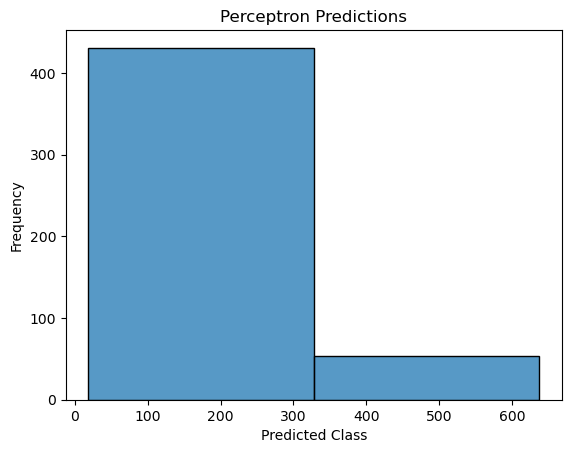

In [76]:
sns.histplot(y_pred, bins=2)
plt.title('Perceptron Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.show()

> The height of the bar at 0 will indicate the number of instances where the model predicted that the stock would go down.

> The height of the bar at 1 will indicate the number of instances where the model predicted that the stock would go up.

In [77]:
prediction

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,

> The distplot would display a histogram of the predicted values from the Perceptron model. Because the model is predicting a binary outcome (0 for the stock going down, and 1 for the stock going up), you would see two bars in the histogram.